# Read in data

In [1]:
import pandas as pd
import csv

path = '../../data/incels/all_comments.csv'
# data = pd.read_csv(path, engine='python', on_bad_lines=lambda x: print(x))
data = pd.read_csv(path, engine='python', on_bad_lines=lambda row: row[:-2].append(' '.join(row[-2:]))) # combine last 2 elements in a line mentioning Gulag
data['parsed_date'] = pd.to_datetime(data.date, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248230 entries, 0 to 6248229
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   type         object        
 1   forum        object        
 2   thread       object        
 3   username     object        
 4   date         object        
 5   content      object        
 6   parsed_date  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 333.7+ MB


In [8]:
data.forum.value_counts()

002-InceldomDiscussion    3725701
003-TheLounge             1794926
004-TheSewers              714612
001-MustReadContent         11476
005-BanAppeals               1514
Name: forum, dtype: int64

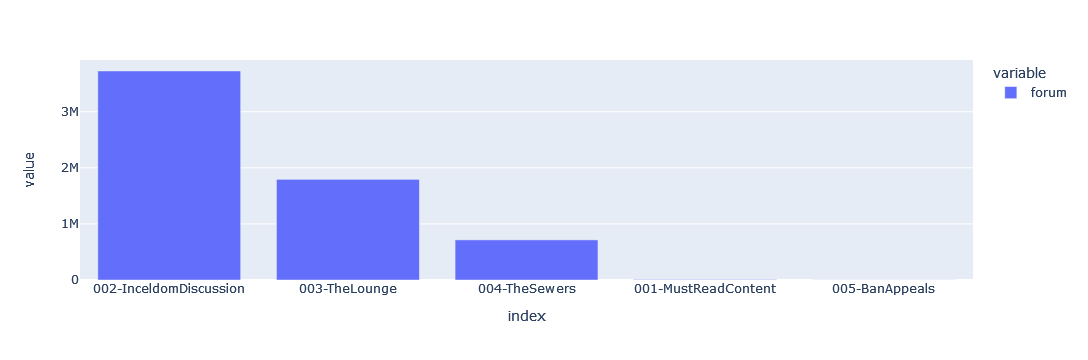

In [7]:
data.forum.value_counts().plot.bar()

In [3]:
print(len(data.thread.unique()))
data.thread.value_counts()[:20]

274341


0000001-Highestquantityofpostsin    57234
0004244-Mostpostsinonethread        32979
0000001-BanDiscussionMegathread     27543
0008013-Letsget15000postsonthist    16642
0002115-Arealmanschallenge100Kpo    13129
0000002-MusicMegathread              8562
0013844-pingpongtest                 3280
0024481-Sissyhypnothreadtojoinme     2682
0055061-Iwillapproach1000girlsan     2584
0000002-HighestquantityofXDsinas     1701
0005439-Dotpill6of100                1318
0000409-TópicoLusófonodoincelsco     1275
0000003-Introductions                1247
0072313-WORLDCUP2018MEGATHREAD       1121
0001675-TheproblemwithYerberito      1083
0070297-isolationthread               908
0003585-Polskiincelscomegathread      902
0018303-Postmaxxingisgettingouto      894
0000132-Iamthekingoftheforum          859
0014794-Sissyhypnothreadtojoinme      857
Name: thread, dtype: int64

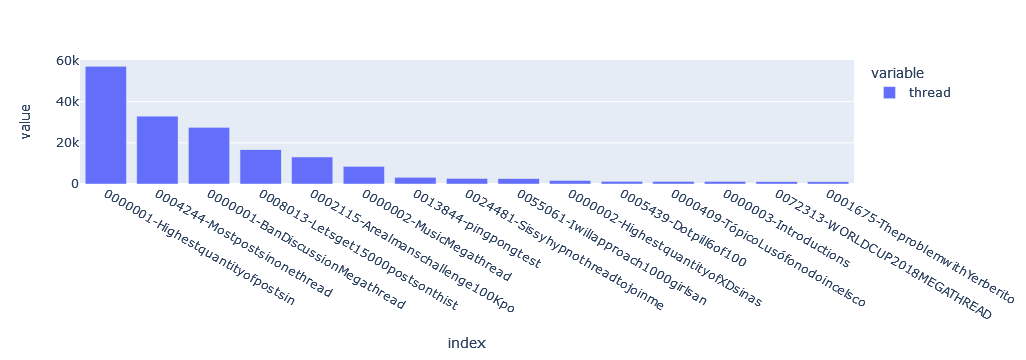

In [9]:
pd.options.plotting.backend = 'plotly'
data.thread.value_counts()[:15].plot.bar()

In [10]:
len(data.username.unique())

8469

In [ ]:
pd.options.plotting.backend = 'plotly'
data.username.value_counts()[:100].plot.bar()

In [ ]:
data.username.value_counts().head(20)

In [16]:
data[['date']]

,date
0,"Nov 20, 2020"
1,"Nov 20, 2020"
2,"Nov 20, 2020"
3,"Nov 20, 2020"
4,"Nov 20, 2020"
...,...
6248225,"Feb 20, 2018"
6248226,"Feb 21, 2018"
6248227,"Feb 21, 2018"
6248228,"Jan 24, 2020"


In [23]:
# pd.to_datetime(data.date, format="%b %-d, %Y")
pd.to_datetime(data.date, errors='coerce') # 5747 dates say 'Yesterday'

0         2020-11-20
1         2020-11-20
2         2020-11-20
3         2020-11-20
4         2020-11-20
             ...    
6248225   2018-02-20
6248226   2018-02-21
6248227   2018-02-21
6248228   2020-01-24
6248229   2020-07-19
Name: date, Length: 6248230, dtype: datetime64[ns]

In [22]:
data.date.str.contains('Yesterday').sum()

5747

In [ ]:
pd.options.plotting.backend = 'plotly'
data.sample(int(1e6)).parsed_date.plot.hist()

In [7]:
print(data.parsed_date.min())
data.parsed_date.max()

2017-11-07 00:00:00


Timestamp('2021-04-07 00:00:00')

# Look into removing \<username\>: said

In [1]:
import pandas as pd
import csv

path = '../../data/incels/all_comments.csv'
# data = pd.read_csv(path, engine='python', on_bad_lines=lambda x: print(x))
data = pd.read_csv(path, engine='python', on_bad_lines=lambda row: row[:-2].append(' '.join(row[-2:]))) # combine last 2 elements in a line mentioning Gulag
data['parsed_date'] = pd.to_datetime(data.date, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248230 entries, 0 to 6248229
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   type         object        
 1   forum        object        
 2   thread       object        
 3   username     object        
 4   date         object        
 5   content      object        
 6   parsed_date  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 333.7+ MB


In [ ]:
pd.set_option('display.max_colwidth', None)

data.loc[data.content.str.contains('said: ').fillna(False), ['content', 'username']].sample(10)

In [8]:
data.content.str.contains('said: ').fillna(False).value_counts(normalize=True)

False    0.527706
True     0.472294
Name: content, dtype: float64

In [9]:
# Count how many have multiple said: occurrences
data.content.str.contains('said:.*said: ').fillna(False).value_counts()

False    5998164
True      250066
Name: content, dtype: int64

In [10]:
# Get usernames
usernames = set(data.username)
len(usernames)

8469

In [3]:
# Extract capitalized words before said: as other usernames
import re
from tqdm.auto import tqdm
tqdm.pandas()

pat = re.compile(r'((?:\b[A-Z][a-z]+ )*)said:|(\S*) said:')
# matches = data.content.str.extract(pat)

def extract_name(text):
    res = None
    match = re.search(pat, text)
    if match:
        res = [el for el in match.groups() if el is not None]
    return res

# matches = data.iloc[:100].content.astype('str').progress_map(extract_name)
matches = data.content.astype('str').progress_map(extract_name)
matches

  0%|          | 0/6248230 [00:00<?, ?it/s]

0                    None
1                    None
2                    None
3                    None
4          [ItsNotADream]
                ...      
6248225              None
6248226              None
6248227              None
6248228              None
6248229              None
Name: content, Length: 6248230, dtype: object

In [ ]:
# View extracted usernames to see if they are likely usernames (certainly seems like it)

from collections import Counter

ctr = Counter()
matches.progress_map(ctr.update)
ctr.most_common(100)

In [19]:
re.search(pat, 'Incels said: something something zingbats said: something else').groups()

('Incels ', None)

In [10]:
name_pat = re.compile(r'(?:(?:\b[A-Z][a-z]+ )*)said:|\S* said:')
test = 'Incels said: something something zingbats said: something else'
re.sub(pat, '', test)

' something something  something else'

In [20]:
re.search(pat, 'something').groups()

AttributeError: 'NoneType' object has no attribute 'groups'